In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

In [2]:
model = YOLO("yolo-models\yolo11_photo_bia.pt")

<>:1: SyntaxWarning: invalid escape sequence '\y'
<>:1: SyntaxWarning: invalid escape sequence '\y'
C:\Users\cuong\AppData\Local\Temp\ipykernel_26144\1430466553.py:1: SyntaxWarning: invalid escape sequence '\y'
  model = YOLO("yolo-models\yolo11_photo_bia.pt")


In [3]:
# image_path = "images\cam\cam_00.jpg"  
image_path = 'images\\bo du lieu bia so 4\\bia4 (309).bmp'
image = cv2.imread(image_path)

In [4]:
# 3. Chuyển ảnh sang định dạng RGB (vì OpenCV đọc ảnh ở định dạng BGR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# # Tăng độ sáng và độ tương phản
# alpha = 1.5  # Độ tương phản (1.0 là không đổi, >1 tăng tương phản)
# beta = 50    # Độ sáng (0 là không đổi, >0 tăng độ sáng)
# image_rgb = cv2.convertScaleAbs(image_rgb, alpha=alpha, beta=beta)

In [5]:
# 3. Tính toán tâm của bức ảnh
height, width, _ = image_rgb.shape
center_x = width // 2  # Tọa độ x của tâm
center_y = height // 2  # Tọa độ y của tâm

In [6]:
# 4. Thực hiện nhận dạng vật thể
results = model(image_rgb)

if len(results[0].boxes) == 0:
    print("Không phát hiện được vật thể nào trong ảnh. Hãy thử giảm ngưỡng độ tin cậy hoặc sử dụng mô hình lớn hơn.")
else:
    print(f"Phát hiện được {len(results[0].boxes)} vật thể trong ảnh.")



0: 480x640 2 bias, 588.4ms
Speed: 2.7ms preprocess, 588.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Phát hiện được 2 vật thể trong ảnh.


In [7]:
# 5. Biến kiểm tra xem tâm có nằm trong photo_frame không
center_in_photo_frame = False
photo_frame_found = False

In [8]:
# 6. Vẽ các vật thể được phát hiện và kiểm tra tâm
for result in results[0].boxes:
    x1, y1, x2, y2 = map(int, result.xyxy[0])  # Tọa độ hộp giới hạn
    label = model.names[int(result.cls)]  # Tên nhãn

    # Chỉ kiểm tra với nhãn "bia" (hoặc nhãn tương ứng nếu dùng mô hình mặc định)
    if label == "bia":  # Thay "bia" bằng nhãn tương ứng nếu dùng mô hình mặc định (ví dụ: "sign")
        photo_frame_found = True

        # Kiểm tra xem tâm có nằm trong hộp giới hạn của bia không
        if x1 <= center_x <= x2 and y1 <= center_y <= y2:
            center_in_photo_frame = True

        # Vẽ hộp giới hạn (màu xanh lá cây)
        cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Vẽ nhãn
        label_text = f"{label}"
        (text_width, text_height), _ = cv2.getTextSize(label_text, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
        cv2.rectangle(image_rgb, (x1, y1 - 20), (x1 + text_width, y1), (0, 255, 0), -1)
        cv2.putText(image_rgb, label_text, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

        print(f"Vật thể: {label}, Tọa độ: ({x1}, {y1}, {x2}, {y2})")
        break

Vật thể: bia, Tọa độ: (306, 132, 408, 236)


In [9]:
# 7. Vẽ tâm của bức ảnh (một chấm đỏ)
cv2.circle(image_rgb, (center_x, center_y), 5, (255, 0, 0), -1)  # Chấm đỏ tại tâm

array([[[169, 144, 152],
        [170, 145, 153],
        [172, 144, 153],
        ...,
        [137, 116, 123],
        [140, 115, 123],
        [141, 116, 124]],

       [[175, 140, 148],
        [175, 140, 148],
        [175, 140, 148],
        ...,
        [138, 115, 121],
        [139, 114, 122],
        [140, 115, 123]],

       [[169, 135, 153],
        [168, 134, 152],
        [172, 139, 150],
        ...,
        [138, 115, 121],
        [140, 115, 123],
        [140, 115, 123]],

       ...,

       [[255, 238, 226],
        [255, 243, 231],
        [255, 236, 227],
        ...,
        [231, 210, 213],
        [231, 211, 211],
        [230, 210, 210]],

       [[255, 252, 238],
        [255, 255, 243],
        [255, 249, 239],
        ...,
        [232, 209, 213],
        [231, 211, 211],
        [230, 210, 210]],

       [[255, 241, 227],
        [255, 244, 230],
        [255, 246, 236],
        ...,
        [230, 209, 214],
        [228, 211, 210],
        [229, 212, 211]]

In [10]:
# 8. Hiển thị kết quả kiểm tra
if not photo_frame_found:
    print("Không tìm thấy khung ảnh (bia) trong ảnh.")
else:
    if center_in_photo_frame:
        print("Tâm của bức ảnh NẰM trong khung ảnh (bia).")
    else:
        print("Tâm của bức ảnh KHÔNG nằm trong khung ảnh (bia).")

Tâm của bức ảnh KHÔNG nằm trong khung ảnh (bia).


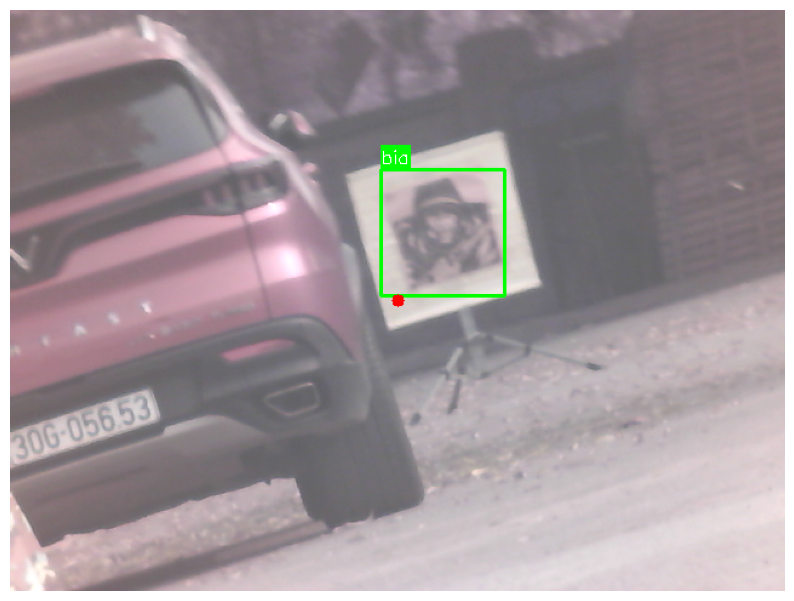

In [11]:
# 9. Hiển thị ảnh
plt.figure(figsize=(10, 8))
plt.imshow(image_rgb)
plt.axis("off")
plt.show()